# Предисловие

## Обращение к читателям из России
Читатели из России, в данном ноутбуке я хочу поделиться своим опытом в области анализа текстов. В нашей странне эта наука называется **"Компьютерная линвистика"**. Западные партнёры называют это **"NLP"** - **Natural Language Processing** (Обработка естественного языка). Одним из известных советских учёных этой области является [**профессор **Белоногов Герольд Георгиевич****](http://ru.wikipedia.org/wiki/Белоногов,_Герольд_Георгиевич)
## Спасибо
Я хочу выразить отдельную благодарность своему другу Али, который на данный момент проживает в Алжире. Он предоставил мне этот профиль, чтобы подарить мне возможность опубликовать свою работу.
## Моя личная идея
Моя личная идея - донести до начинающих аналитиков данных на доступном родном языке информацию о том, как происходит анализ текстовых данных. Как в последующем можно применить разработанную модель в своих информационных системах.
## Для кого подойдет эта работа?
Эта работа подойдет для изучения студентам, которые только-только решили попробовать себя в анализе текстовых данных.

## Примеры применения технологий классификации текстов
* Определение СПАМа.
* Определение фишинговых сообщений.
* Определение тональности сообщений.
* Определение тематики информационных атак в социальных сетях (например, на просторах Telegram, где противоборствующие стороны распространяют дискредитирующую информацию друг о друге).

## Для чего мы это делаем? 
* Для блокировки несущих угрозу сообщений.
* Для своевремнного реагирования на угрожающие сообщения.
* Для выделения из всего огромного массива информации сообщений на заданную тематику.

## В завершение предисловаия
На сегодняшний день, каждый программист должен иметь опыт автоматизированного(автоматического) сбора информации из сети "Интернет". Для этого используются технологии [парсинга (синтаксический анализ текста)](http://ru.wikipedia.org/wiki/Синтаксический_анализ), например, когда мы хотим собрать информацию с сайтов букмекерских контор, либо курсы акций для анализа; и [граббинг](http://proglib.io/p/pishem-prostoy-grabber-dlya-telegram-chatov-na-python-2019-11-06?ysclid=loiyf5tarf710260360), когда мы грубо перекачиваем информацию с информационного ресурса, например, всем известным [telethon'ом](http://docs.telethon.dev/en/stable/) из Telegram. Это позволяет модератором каналов в автоматизированном режиме обнаруживать деструктивные сообщения, например, реклама порнографии или оскорбление пользователей. На сегодня задача сбора сообщений решена и остро стоит вопрос в её обработке. 
Ответьте себе на вопрос, какой смысл хранить Вам в вашей Базе данных миллионы текстов, которые вы даже физически не сможете прочитать? ¯\_(ツ)_/¯ 

[Почитать про третий информационный барьер](http://ru.wikipedia.org/wiki/Информационный_барьер).

# Разберёмся в предметной области
## Постановка задачи
Вы работаете в СМИ. У Вашей компании есть задача своевременного реагирования на фейковую информацию для последующего опровержения или блокировки источника. Ваши специалисты собрали для Вас выборку из фейковых и нефейковых сообщений. Ваша задача - разработать алгоритм для обнаружения фейковых сообщений. 

## Зачем нам нужен Jupyter Notebook?
Работа в Jupyter Notebook - это **промежуточный** этап разработки. Он удобен для первичного отлаживания и создания моделей.

## Порядок работы
### Первичный анализ исходных данных
Допустим,группа ассессоров сформировала для Вас выборку сообщений. Это может быть как Excel-файл, набор текстовых файлов, либо содержание Базы данных. После того, как Вы загрузили датасет, Вам необходимо:
1. Убедится в корректности типов данных
1. Определить наличие либо остутствие пустых значений. Если таковые имеются, то Вы можете:
    * Грубо удалить строки с пустыми значениями
    * Заполнить их средними значениями
    * Если это таргетированный класс, то Вы можете заполнить определить для них отдельное значение, например 'undefined'
1. Определить наличие или отстутствие дублирующихся строк. В случае их наличия, стоит их удалить, иначе, это будет негативно влиять не обучение модели.
1. Проанализировать датасет на наличие выбросов (для текстовых данных редко актуально)

### В каждой шутке лишь только доля шутки... 
Конечно, в боевых коммерческих системах, ассессоры - это мотивированные дипломированные специалисты, результаты оценки которых мы проверяем при помощи коэффициента конкордации, но очень чсто на практике ассессорами являются обычные работяги без особой мотивации, цель которых - побыстрее выполнить свою работу и пойти играть под пивас в Доту на Баре или Пудже. Вся Ваша работа напрямую зависит от качества исходных данных. Если Ваши данные плохи, то и модель будет плоха. 

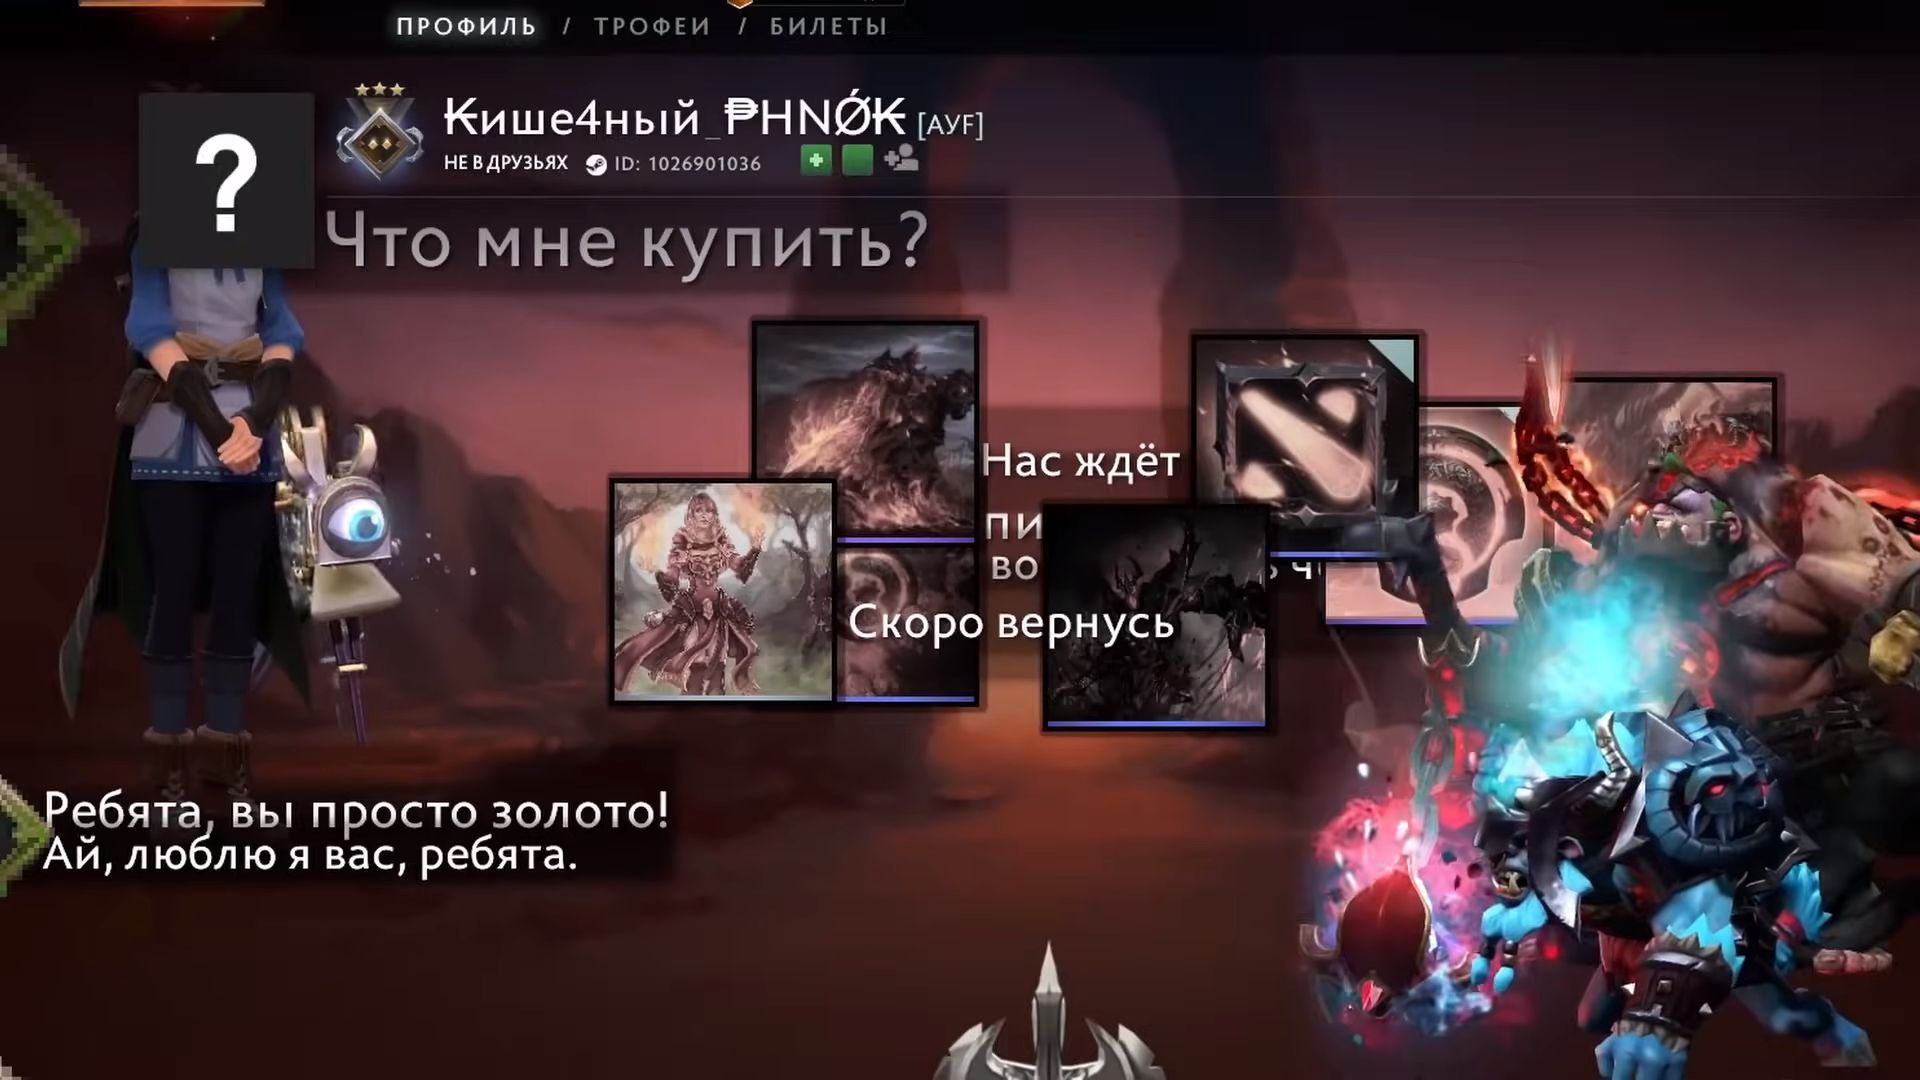


### О какой выборке мечтает каждый аналитик
1. Выборка должна обладать свойствами [генеральной совокупности](http://ru.wikipedia.org/wiki/Генеральная_совокупность)
1. Соблюдена гипотеза компактности - классы образуют компактно локализованные подмножества в пространстве объектов. То есть, сообщения разных классов, не пересекаются и на гиперпространстве находятся достаточно удаленно друг от друга, а сами же объекты класса находятся рядом.
1. Количество объектов разных классов в обучающей выборке должно совпадать.

## Создание модели машинного обучения
1. Очистка текста
2. Векторизация текста 

(Если совместить первые два шага, мы получим процесс, называем **предобработкой текста**)

3. Обучение модели машинного обучения

### Как выбрать модель машинного обучения?
На этапе создания модели машинного обучения Вы должны поставить себе критерии оценки её качества:
1. Оперативность обучения модели машинного обучения 
* Вам придется регулярно переобучать Вашу модель, так как это необходимо для повышения её качества в последующем, кроме того, заказчик будет напрямую бить по Вашему кошельку, если количество электроэнергии потраченное на переобучение модели будет стоить неоправданно дорого
2. Оперативность обработки сообщений моделью машинного обучения 
* Модель не должна обрабатывать сообщения медленее, чем поступают новые. При этом сама скорость обработки сообщений, в первую очередь, зависит от алгоритмов, а не мощности железа. [Средства не виноваты в том, что их безграмотно используют](http://ru.wikipedia.org/wiki/Дейкстра,_Эдсгер_Вибе).

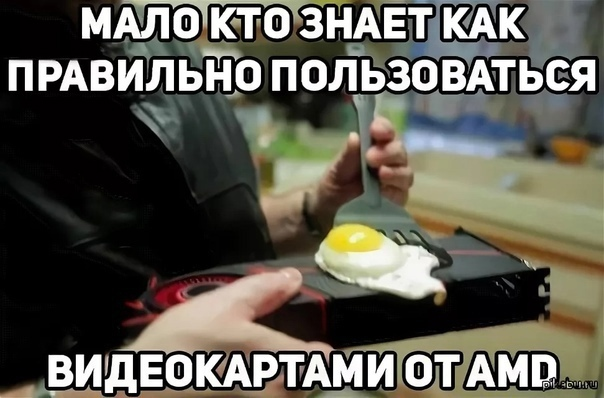

3. Полнота (доля истинно положительных классификаций)
4. Точность (доля правильных ответов)

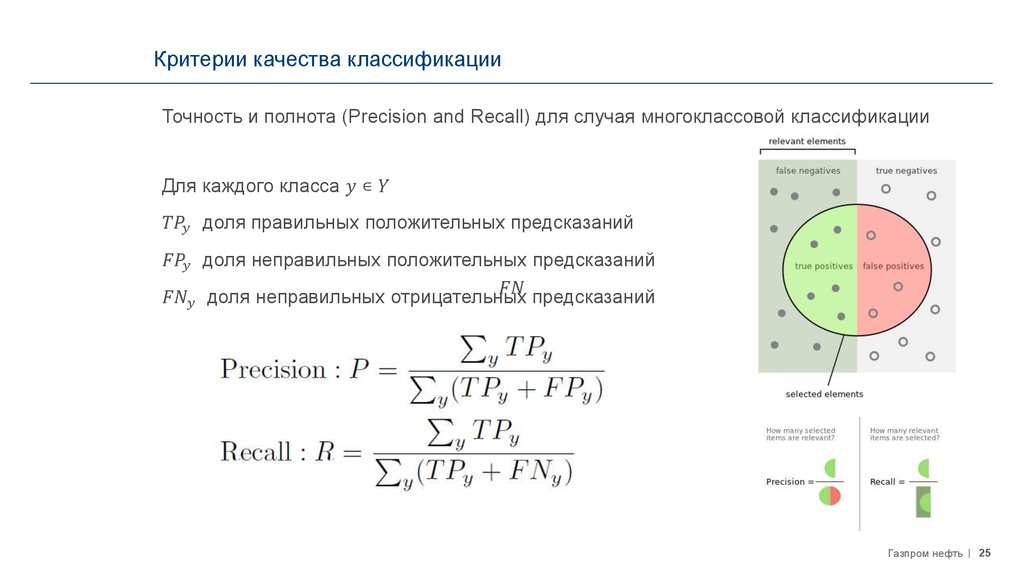

На основе этих критериев Вы и будете выбирать нужную для Вас модель. Критерии Вы выбираете сами, либо за Вас это делает Ваш заказчик.

## Что после?
После разработки алгоритма очистки текста и создания модели машинного обучения, Вы должны интегрировать её в Вашу систему.
Дешевым и простым в реализации способом,без использования дополнительных программно-аппаратных средств - это разработка специализированного модуля для Вашей информационной системы

Продвинутый и более дорогой метод - использование программно-аппаратных средств для организации распределенной обработки данных. 

Хороший пример - [**Hadoop**](http://hadoop.apache.org)

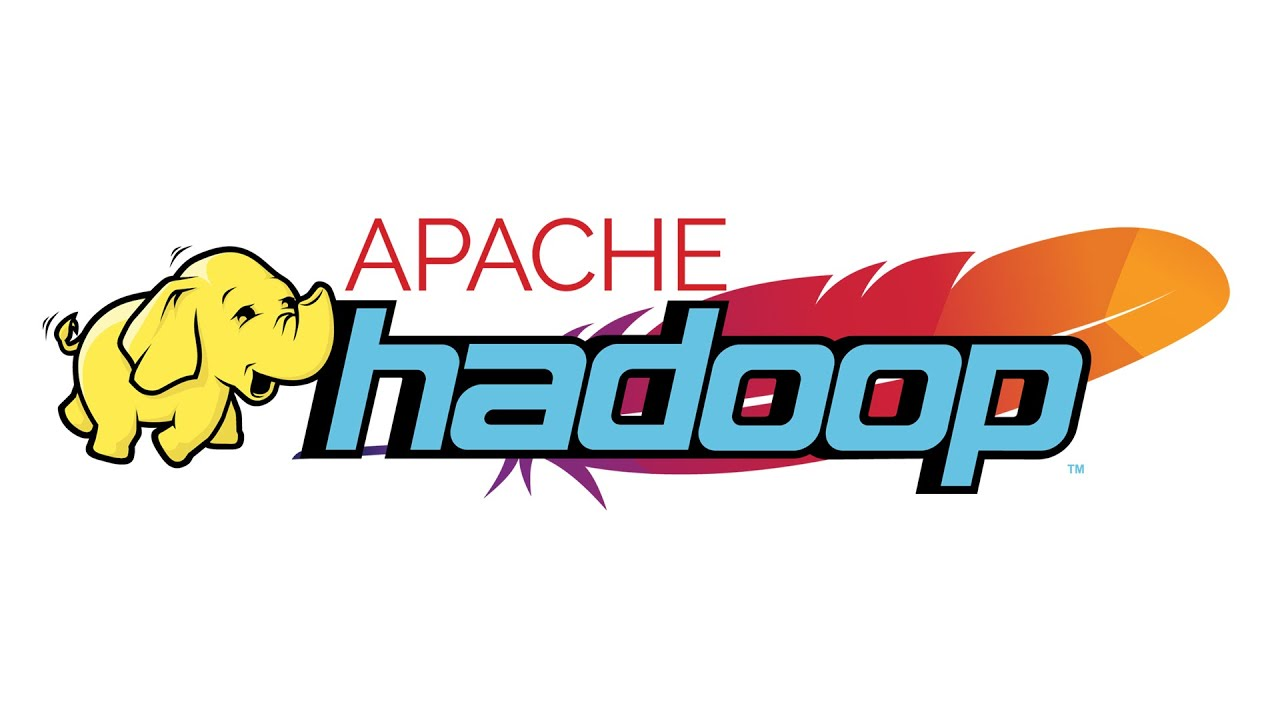

В самом конце будет приведён пример части подобного модуля. 
Этот этап уже не является промежуточным этапом. Это уже **боевое** применение модели

# Начало


## Импортируем необходимые библиотеки, классы и функции

In [1]:
!pip install pymorphy2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')  # В нашем примере мы используем датасет новостей на английском языке
from nltk.corpus import stopwords
import pymorphy2

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack

from string import punctuation
import re
from time import time
import pickle
from abc import ABC, abstractmethod
from concurrent.futures import ProcessPoolExecutor

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Загружаем предоставленные данные

In [3]:
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake['fake_or_true'] = 'Fake'
true['fake_or_true'] = 'True'
df  = pd.concat(
    [
        fake,
        true,
    ]
)

## Первичный анализ исходных данных

### Взгляд "свысока"

In [4]:
df.head(5)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date fake_or_true  
0  December 31, 2017         Fake  
1  December 31, 2017         Fake  
2  December 30, 2017         Fake  
3  December 29, 2017         Fake  
4  December 25, 2017         Fake

### Ползущий хвостом вперёд уж

In [5]:
df.tail(5)

title  \
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date fake_or_true  
21412  August 22, 2017          True  
21413  August 22, 2017          True  
21414  August 22, 2017          True  
21415  August 22, 2017          True  
21416  August 22, 2017          True

Датафрейм загрузился чётко и готов к работе. Можно заметить, что датафрейм достаточно массивен.
Столбцы датафрейма:
* title - столбец с заголовком новости
* text - столбец с содержанием новости
* subject - столбец с тематикой новостей
* date - столбец с датой публикацией
* fake_or_true - нащ целевой столбец, определяющий фейковая новость или нет.

### Разберёмся с типами данных

In [6]:
df.dtypes

title           object
text            object
subject         object
date            object
fake_or_true    object
dtype: object

Мы не планируем использовать столбец "date" для анализа и поэтому его тип данных для нас не важен. В остальном нас всё устраивает

### Находим пустые значения

In [7]:
df.isnull().sum()

title           0
text            0
subject         0
date            0
fake_or_true    0
dtype: int64

Великолепно, пустых значений нет.

In [8]:
df.duplicated().sum()

209

Дублирующиеся строки необходимо удалить из нашего датасета

In [9]:
df.drop_duplicates(inplace=True)

### Распределение классов

#### Что если "subject" был бы целевым столбцом?

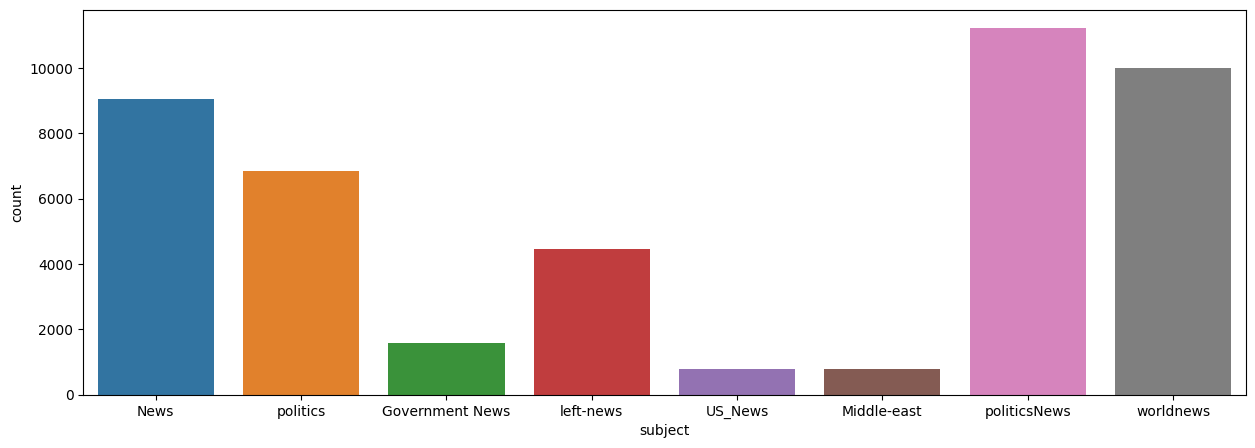

In [10]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(df, x='subject')
plt.show()

#### Представим, что нашим целевым параметром был бы subject:
Классы распределенны **неравномерно**. На самом деле, не тема диктует данные, а данные тему. С этим ничего не поделаешь. Есть два выхода: оставить всё как есть и работать с этим дальше, либо отсеять данные по минимальному значению, то есть выбрать из каждого класса по 778 сообщений. В нашем случае, он всё же не является целевым параметром, следовательно, трогать мы его не будем. Но стоит учесть, что подобный **дисбаланс классов негативно влияет на точность модели**.

#### Но всё же "fake_or_true" наш целевой параметр

In [11]:
df.value_counts('fake_or_true', normalize=True)

fake_or_true
Fake    0.525364
True    0.474636
Name: proportion, dtype: float64

<Axes: xlabel='fake_or_true', ylabel='Count'>

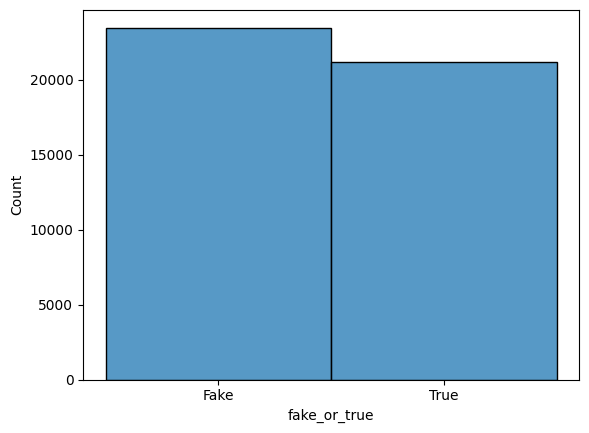

In [12]:
sns.histplot(df['fake_or_true'])

В идеале, количество сообщений по класса "Fake" и "True" должно быть равным, так как это наши целевые классы, которые мы и будем прогнозировать.

#### Нужно больше графиков!
Больше графиков нам строить нет необходимости, мы уже можем сделать выводы о нашей выборке:
* Существует существенный дисбаланс классов по параметру "subject".
* Выборка почти равномерная по отношению к столбцу fake_or_true, что говорит об низком дисбалансе целевого параметра.

## Создание модели машинного обучения
### Предобработка текста
Процесс **предобработки текста** состоит из двух этапов:
1. Очистка текста:
    * Приведение слов к нижнему регистру
    * Удаление пунктуации
    * Удаление двойных пробелов
    * ... (дополнительно, после удаления двойных пробелов, Вы можете удалить цифры, url-ссылки и прочее. В нашем случае в этом нет особой необходимости
    * Нормализация слов(Стемминг / Лемматизация)
        * Стемминг – это грубый эвристический процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.
        * Лемматизация – это более тонкий процесс, который использует словарь и морфологический анализ, чтобы в итоге привести слово к его канонической форме – лемме.    
        
        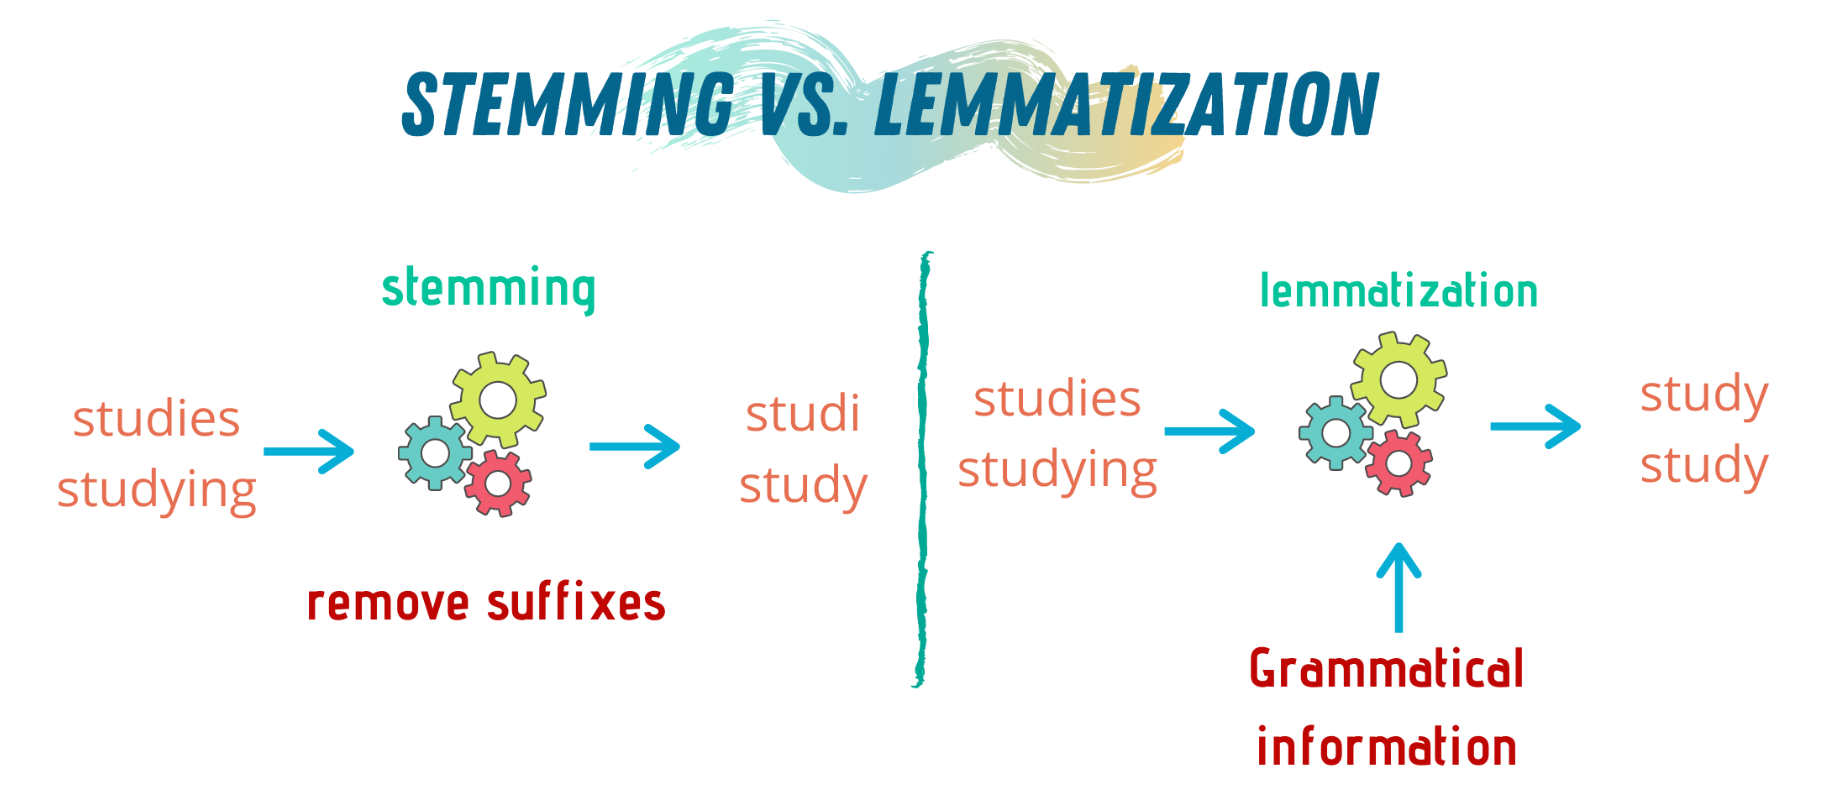
        
        Стемминг гораздо быстрее, чем лемматизация, но лемматизация точнее. На практике, львиную долю времени у Вас как раз и будет занимать предобработка текста из-за нормализации слов. Если вы не будете использовать нормализацию слов, то качеств модели сильно снизится.
    * Удаление стоп-слов (этот процесс тоже сильно страдает, когда вы не используете нормализацию слов)
2. Векторизация текста
*     Модели машинного обучения работают с числами. Компьютер видит слово "привет", как последовательность символов кодировки UTF-8. Для того, чтобы компьютеру стало понятно, что здесь написано, привычные нам слова необходимо перевести в числа.

#### Создадим функцию для очистки текста

In [13]:
morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('english'))
def clean_text(df):
    df['clean_text'] = df['text'].str.lower()
    df['clean_text'] = df['clean_text'].apply(lambda x: x.translate(str.maketrans('', '', punctuation)))
    df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x))
    df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([morph.parse(word)[0].normal_form for word in x.split(' ') if word not in stop_words]))
    return df

#### Проверяем нашу функцию очистки текста

In [14]:
clean_text(df.head(5))['clean_text']

0    donald trump wish americans happy new year lea...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: clean_text, dtype: object

Нас устраивает как функция производит очистку текста

#### Переделаем нашу функцию для очистки двух столбцов:

In [15]:
def clean_text(df, column):
    df[f'clean_{column}'] = df[column].str.lower()
    df[f'clean_{column}'] = df[f'clean_{column}'].apply(lambda x: x.translate(str.maketrans('', '', punctuation)))
    df[f'clean_{column}'] = df[f'clean_{column}'].apply(lambda x: re.sub(r'\s+', ' ', x))
    df[f'clean_{column}'] = df[f'clean_{column}'].apply(lambda x: ' '.join([morph.parse(word)[0].normal_form for word in x.split(' ') if word not in stop_words]))
    return df

#### Произведем очистку нашего датафрейма

In [16]:
df = clean_text(df, 'text')
df = clean_text(df, 'title')
df

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date fake_or_true  \
0      December 31, 2017         Fake   
1      December 31, 2017         Fake   
2      December 30, 2017         Fake   
3      December 29, 2017         Fake   
4      December 25, 2017         Fake   
...                  ...          ...   
21412   August 22, 2017          True   
21413   August 22, 2017          True   
21414   August 22, 2017          True   
21415   August 22, 2017          True   
21416   August 22, 2017          True   

                                              clean_text  \
0      donald trump wish americans happy new year lea...   
1      house intelligence committee chairman devin nu...   
2      friday revealed former milwaukee sheriff david...   
3      christmas day donald trump announced would bac...   
4      pope francis used annual christmas day message...   
...                                                  ...   
21412  brussels reuters nato allies tuesday welcomed ...   
21413  london reuters lexisnexis provider legal regul...   
21414  minsk reuters shadow disused sovietera factori...   
21415  moscow reuters vatican secretary state cardina...   
21416  jakarta reuters indonesia buy 11 sukhoi fighte...   

                                             clean_title  
0       donald trump sends embarrassing new year’s ev...  
1       drunk bragging trump staffer started russian ...  
2       sheriff david clarke becomes internet joke th...  
3       trump obsessed even obama’s name coded websit...  
4       pope francis called donald trump christmas sp...  
...                                                  ...  
21412  fully committed nato backs new us approach afg...  
21413    lexisnexis withdrew two products chinese market  
21414             minsk cultural hub becomes authorities  
21415  vatican upbeat possibility pope francis visiti...  
21416       indonesia buy 114 billion worth russian jets  

[44689 rows x 7 columns]

#### Категориальные данные
В нашем датафрейме есть столбец "subject". Этот столбец владеет [категориальными значениями](http://habr.com/ru/articles/527860/). 
> С категориальными данными всё просто. Если целью является не просто кодировка (шифровка) значений какими-то числами, то единственный доступный вариант — это представить их в виде значений “1” — “0” (ДА — НЕТ) для каждой возможной категории. Это так называемое one-hot-кодирование. Когда вместо одного категориального признака появится столько новых “булевых” признаков, сколько существует возможных категорий.


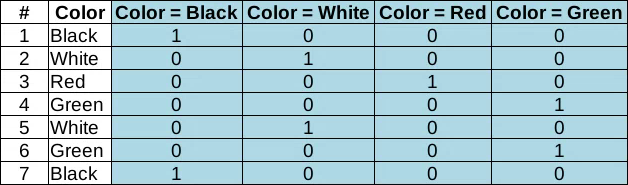


In [17]:
dummies = pd.get_dummies(df['subject'], prefix='subject')
dummies

subject_Government News  subject_Middle-east  subject_News  \
0                        False                False          True   
1                        False                False          True   
2                        False                False          True   
3                        False                False          True   
4                        False                False          True   
...                        ...                  ...           ...   
21412                    False                False         False   
21413                    False                False         False   
21414                    False                False         False   
21415                    False                False         False   
21416                    False                False         False   

       subject_US_News  subject_left-news  subject_politics  \
0                False              False             False   
1                False              False             False   
2                False              False             False   
3                False              False             False   
4                False              False             False   
...                ...                ...               ...   
21412            False              False             False   
21413            False              False             False   
21414            False              False             False   
21415            False              False             False   
21416            False              False             False   

       subject_politicsNews  subject_worldnews  
0                     False              False  
1                     False              False  
2                     False              False  
3                     False              False  
4                     False              False  
...                     ...                ...  
21412                 False               True  
21413                 False               True  
21414                 False               True  
21415                 False               True  
21416                 False               True  

[44689 rows x 8 columns]

Подобная нормализация положительно сказывается на качество обработки. Но также она и обладает существенным недостатком - увеличение объема требуемой для обработки памяти и дополнительная нагрузка как на обучение модели, так и на обработку.

In [18]:
subject_cols = dummies.columns
df = pd.concat([df, dummies], axis=1)
train_cols = list(dummies.columns)
train_cols = train_cols + ['clean_text', 'clean_title']
df

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date fake_or_true  \
0      December 31, 2017         Fake   
1      December 31, 2017         Fake   
2      December 30, 2017         Fake   
3      December 29, 2017         Fake   
4      December 25, 2017         Fake   
...                  ...          ...   
21412   August 22, 2017          True   
21413   August 22, 2017          True   
21414   August 22, 2017          True   
21415   August 22, 2017          True   
21416   August 22, 2017          True   

                                              clean_text  \
0      donald trump wish americans happy new year lea...   
1      house intelligence committee chairman devin nu...   
2      friday revealed former milwaukee sheriff david...   
3      christmas day donald trump announced would bac...   
4      pope francis used annual christmas day message...   
...                                                  ...   
21412  brussels reuters nato allies tuesday welcomed ...   
21413  london reuters lexisnexis provider legal regul...   
21414  minsk reuters shadow disused sovietera factori...   
21415  moscow reuters vatican secretary state cardina...   
21416  jakarta reuters indonesia buy 11 sukhoi fighte...   

                                             clean_title  \
0       donald trump sends embarrassing new year’s ev...   
1       drunk bragging trump staffer started russian ...   
2       sheriff david clarke becomes internet joke th...   
3       trump obsessed even obama’s name coded websit...   
4       pope francis called donald trump christmas sp...   
...                                                  ...   
21412  fully committed nato backs new us approach afg...   
21413    lexisnexis withdrew two products chinese market   
21414             minsk cultural hub becomes authorities   
21415  vatican upbeat possibility pope francis visiti...   
21416       indonesia buy 114 billion worth russian jets   

       subject_Government News  subject_Middle-east  subject_News  \
0                        False                False          True   
1                        False                False          True   
2                        False                False          True   
3                        False                False          True   
4                        False                False          True   
...                        ...                  ...           ...   
21412                    False                False        

#### Векторизация текста

[CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
> [CountVectorizer](http://habr.com/ru/articles/504744/) — это простой способ векторизовать и представлять текстовые документы.
> Он токенизирует входные данные и строит словарь известных слов, а затем представляет документ, используя этот словарь.

Суть данного метода проста: каждую новость мы можем представить как список частот слов. Где слово идентефицируется индексом в списке, а значение - количеством вхождений слов в документ.
Плюсы: 
Просто. Быстро. Удобно.
Минус - низкая точность.

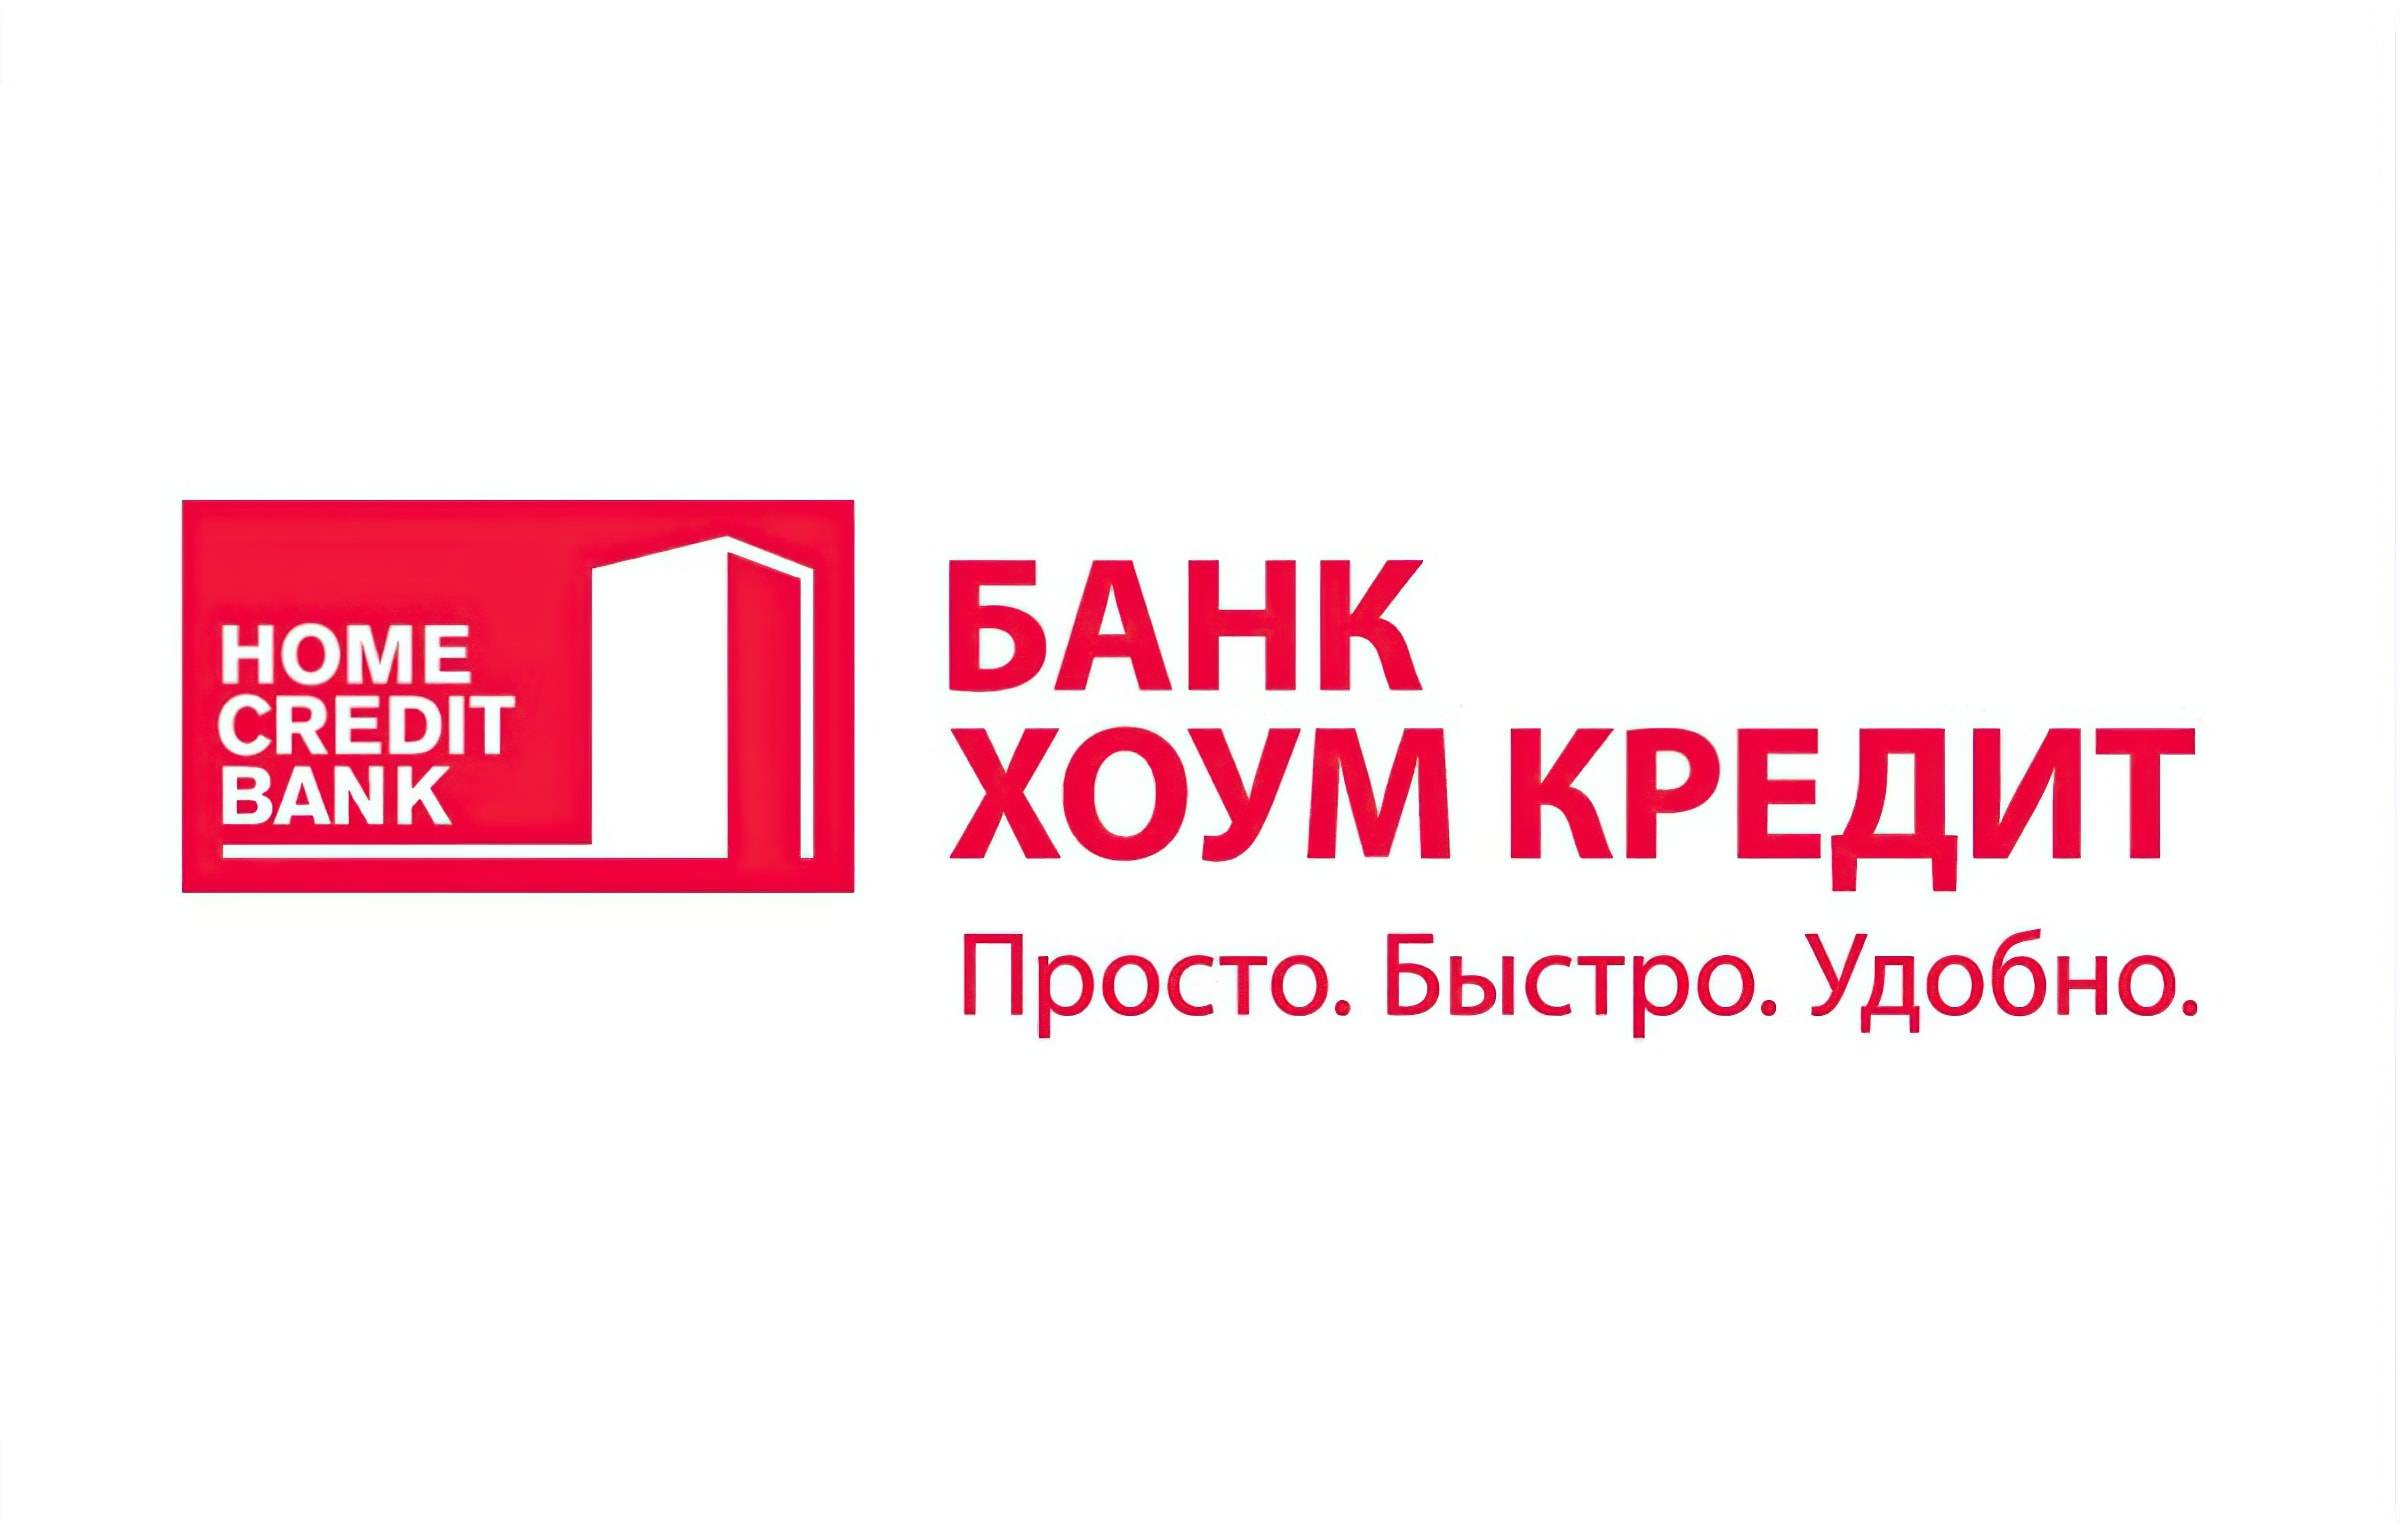



[TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

> Term Frequency-Inverse Document Frequency (TF-IDF) — это один из наиболее распространенных и мощных методов для извлечения признаков из текстовых данных. TF-IDF вычисляет важность каждого слова в документе относительно количества его употреблений в данном документе и во всей коллекции текстов. Этот метод позволяет выделить ключевые слова и понять, какие слова имеют больший вес для определенного документа в контексте всей коллекции.

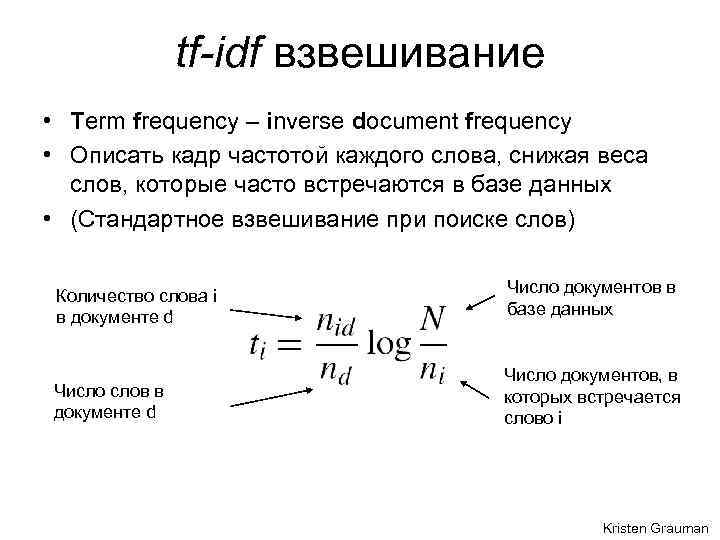

Говоря простым языком: слово редко встречается в документах - слово важно для документа. Слово часто встречается в документах - слово неважно для документа.

**Плюс** - высокая точность
**Минусы** - повышаются требования к производительности и объёму памяти.

##### Наиболее важные параметры:

* min_df - Этот параметр определяет минимальное количество документов, в которых должен встречаться термин (слово или словосочетание), чтобы быть включенным в TF-IDF матрицу. Например, если min_df=2, то только термины, встречающиеся в как минимум 2 документах, будут включены в TF-IDF матрицу. Это может быть полезно для фильтрации редких терминов, которые могут быть шумом.
* max_df - Этот параметр определяет максимальное документов, в которых должен встречаться термин (слово или словосочетание), чтобы быть включенным в TF-IDF матрицу. Например, если max_df=0.9, то только термины, встречающиеся менее чем в 90% документах, будут включены в TF-IDF матрицу. Это может быть полезно для фильтрации частых терминов, которые не являются значимыми. 
* ngram_range - Этот параметр позволяет учитывать не только отдельные слова (унграммы) в TF-IDF матрице, но и комбинации слов (биграммы, триграммы и т. д.). Например, ngram_range=(1, 2) позволит учитывать как отдельные слова, так и биграммы. Вы можете задать ngram_range в виде кортежа, где первый элемент - минимальная длина н-граммы, а второй элемент - максимальная длина. Это может быть полезно для учета контекста в тексте.
* max_features - Этот параметр определяет максимальное количество элементов, которые можно включить в TF-IDF матрицу.

Настраивая эти параметры, мы повышаем точность, снижаем требуемый объём памяти (вводя N-граммы, мы требуемый объём памяти повышаем, но и точность тоже возрастает)

#### Мы создадим два векторизатора, так как нам необходимо отдельно векторизовать как текст, так и заголовок.

##### Делим датасет на обучающую и тестовую выборки

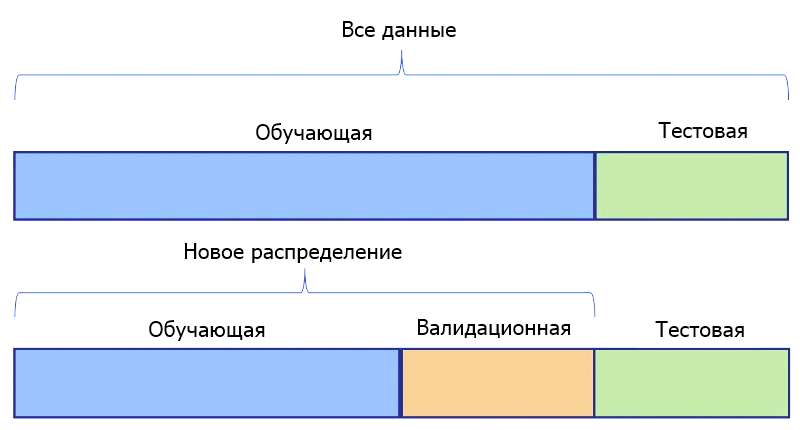

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[train_cols], df['fake_or_true'], test_size=0.2, random_state=42)

##### Векторизуем текст

In [20]:
tfidf_vectorizer_text = TfidfVectorizer(ngram_range=(1, 2), max_features=50_000, min_df=2, max_df=0.9)
tfidf_vectorizer_title = TfidfVectorizer(ngram_range=(1, 2), max_features=50_000, min_df=2, max_df=0.9)

In [21]:
tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(X_train['clean_text'])
tfidf_matrix_title_train = tfidf_vectorizer_title.fit_transform(X_train['clean_title'])

В нашей задаче мы анализируем и текст и заголовок. Для это нам нужно объединить матрицы для их совместного анализа

In [22]:
combined_tfidf_df_train = hstack([tfidf_matrix_text_train, tfidf_matrix_title_train, X_train[dummies.columns]])

In [23]:
combined_tfidf_df_train

<35751x100008 sparse matrix of type '<class 'numpy.float64'>'
	with 7688321 stored elements in COOrdinate format>

### Обучение модели машинного обучения

#### RandomForestClassifier
##### Классификатор случайного леса прекрасно распараллеливается. Немного теории:
Классификатор случайного леса основан на "голосовании" каждым построенным деревом за принадлежит объекта тому или иному классу. В силу этого, например, из 100 деревьев, в 5 потоках, мы можем создавать по 20 деревьев в одном потоке, тем самым ускоряя процесс обучения

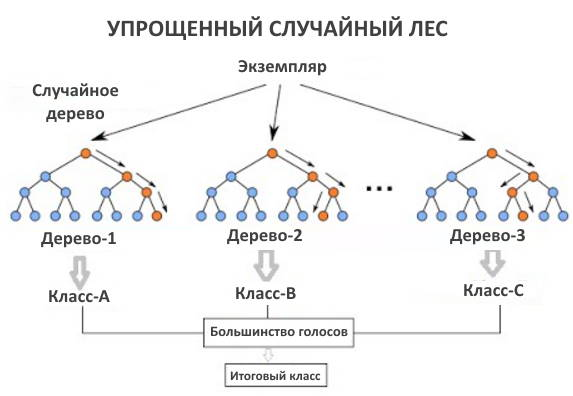

Для ускорения процесса я сделал маленькую сетку, но Вы можете увеличить сетку для поиска более подходящих комбинаций.
Конкретная реализаци сетки в данном примере не так важна. Это лишь пример того, как перебором можно получить самую эффективную модель, так как этот процесс может происходит очень долго. 
Кроме того, количество кросс-валидаций мультипликативно влияет на количество итераций. Больше - лучше. Но здесь мы опустим это.

In [24]:
param_grid_rf = {
    'n_estimators': [100,],
    'max_depth': [None,],
    'min_samples_split': [2, 5,],
    'min_samples_leaf': [2,],
}
rfc = RandomForestClassifier()
grid_search_rf = GridSearchCV(rfc, param_grid_rf, cv=5, scoring='accuracy', n_jobs=4, verbose=10)
grid_search_rf.fit(combined_tfidf_df_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 1/2] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 1/2] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 1/2] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 1/2] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.998 total time= 1.2min
[CV 5/5; 1/2] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 1/2] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.999 total time= 1.2min
[CV 1/5; 1/2] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.998 total time= 1.2min
[CV 1/5; 2/2] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None], 'min_samples_leaf': [2],
                         'min_samples_split': [2, 5], 'n_estimators': [100]},
             scoring='accuracy', verbose=10)

max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;

In [25]:
best_params_rf = grid_search_rf.best_params_
scores_rf = grid_search_rf.cv_results_
print('RandomForest best params:', best_params_rf)
print('Scores:', scores_rf)
print('Mean score:', scores_rf['mean_test_score'])
print('Std Deviation:', scores_rf['std_test_score'])

RandomForest best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Scores: {'mean_fit_time': array([69.38399777, 62.18167686]), 'std_fit_time': array([0.63193086, 8.39323158]), 'mean_score_time': array([1.29082136, 1.01511192]), 'std_score_time': array([0.19028053, 0.10913474]), 'param_max_depth': masked_array(data=[None, None],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[2, 2],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 5],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[100, 100],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}, {'max_depth': None, 'min_samp

##### Здесь мы видим, что наилучшие параметры модели:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Для последующих сравнений мы будем использовать модель именно с этими параметрами.

### Logistic Regression
[Логистическая регрессия](http://u.wikipedia.org/wiki/Логистическая_регрессия) - находит взаимосвязи между зависимыми переменными на основе логистической функции. Великолепно работает с текстами в совокупности с задачей бинарной классификации.

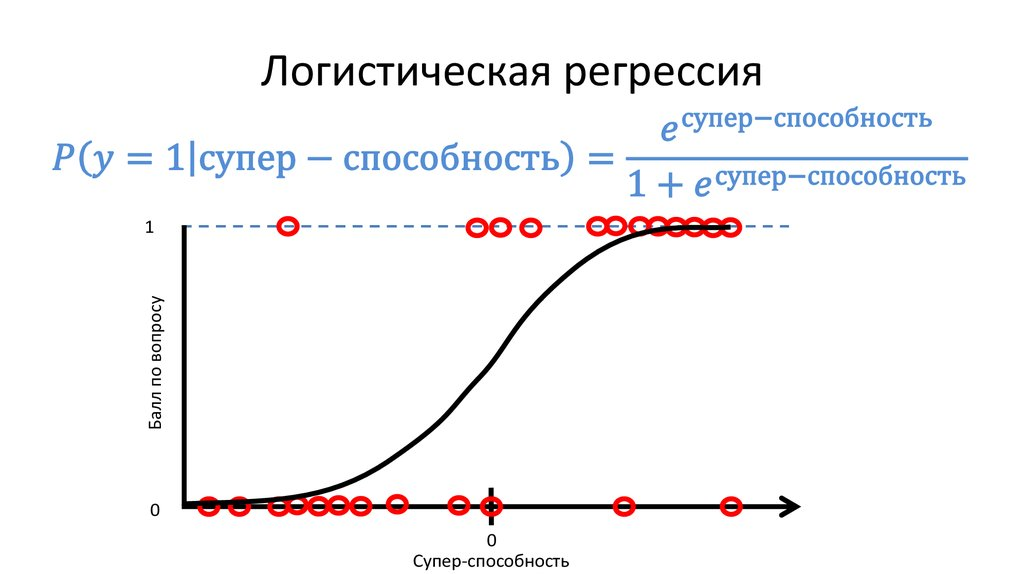

In [26]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1,],
    'penalty': ['l1', 'l2'], 
}
lr = LogisticRegression()
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=1, verbose=10)
grid_search_lr.fit(combined_tfidf_df_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START C=0.001, penalty=l1.........................................
[CV 1/5; 1/8] END ............C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/8] START C=0.001, penalty=l1.........................................
[CV 2/5; 1/8] END ............C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/8] START C=0.001, penalty=l1.........................................
[CV 3/5; 1/8] END ............C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/8] START C=0.001, penalty=l1.........................................
[CV 4/5; 1/8] END ............C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/8] START C=0.001, penalty=l1.........................................
[CV 5/5; 1/8] END ............C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/8] START C=0.001, penalty=l2.........................................
[CV 1/5; 2/8] END ..........C=0.001, penalty=l2;,

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=10)

In [27]:
best_params_lr = grid_search_lr.best_params_
scores_lr = grid_search_lr.cv_results_
print('Logistic Regression best params:', best_params_lr)
print('Scores:', scores_lr)
print('Mean score:', scores_lr['mean_test_score'])
print('Std Deviation:', scores_lr['std_test_score'])

Logistic Regression best params: {'C': 0.001, 'penalty': 'l2'}
Scores: {'mean_fit_time': array([0.0316659 , 2.08749871, 0.03253055, 2.51790094, 0.02835894,
       3.32254372, 0.02938561, 4.22932291]), 'std_fit_time': array([0.00387522, 0.22978624, 0.00608754, 0.16953073, 0.00053905,
       0.21582077, 0.00115278, 0.34001817]), 'mean_score_time': array([0.        , 0.07754612, 0.        , 0.08478017, 0.        ,
       0.07790461, 0.        , 0.07225232]), 'std_score_time': array([0.        , 0.01680264, 0.        , 0.01143564, 0.        ,
       0.02084603, 0.        , 0.00920908]), 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 

##### Здесь мы видим, что наилучшие параметры модели:
{'C': 0.001, 'penalty': 'l2'}

### [MultinomialNB](http://scikit-learn.ru/1-9-naive-bayes/?ysclid=loj40ijp43960788518)
Мультиномиальный Наивный Байесовский классификатор относится к Наивным Байесовским классификаторам (кто бы мог подумать 😅). В целом, они все работают по одному принципу - анализ априорной и апостериорной вероятностей принадлежности объекта к определенному классу: в определенной точке гиперпространства, в которую попал наш объёкт, берутся значения вероятностей принадлежности к тому или иному классу (например, 0.64: Fake, 0.36: True) и присваивается к соответствующему классу, в нашем случае к Fake. (Если Вы не поняли, то простите, я не умею объяснять ¯_(ツ)_/¯) 

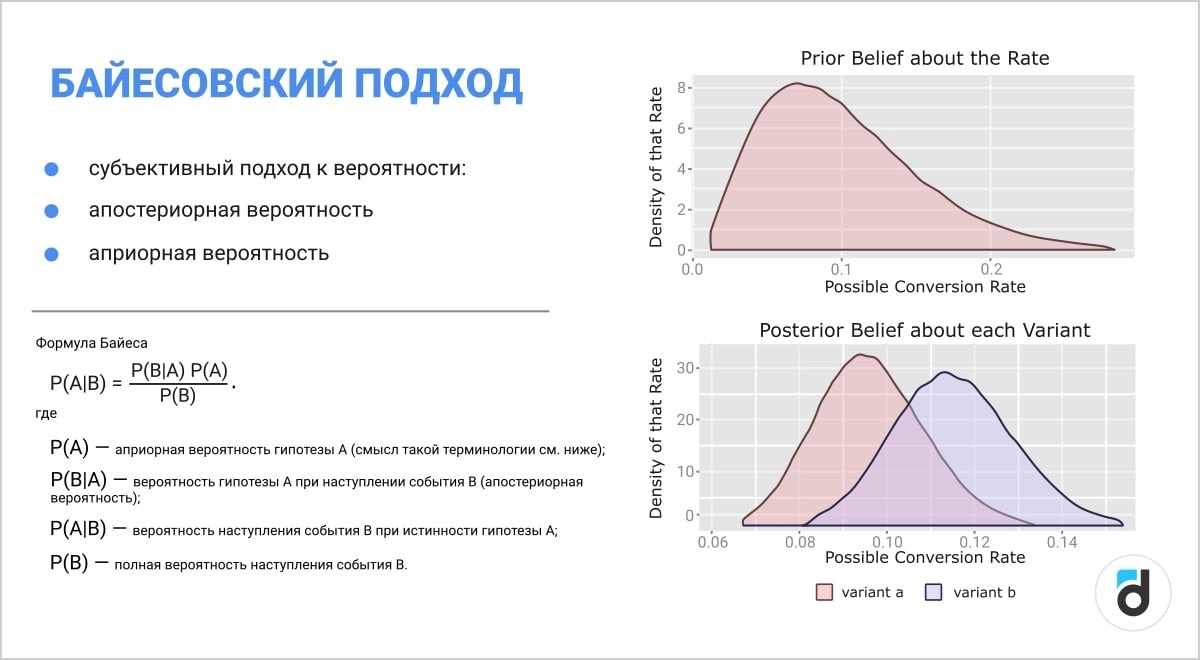

In [28]:
param_grid_mnb = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_prior': [True, False]    
}
mnb = MultinomialNB()
grid_search_mnb = GridSearchCV(mnb, param_grid_mnb, cv=5, scoring='accuracy', n_jobs=4, verbose=10)
grid_search_mnb.fit(combined_tfidf_df_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START alpha=0.01, fit_prior=True..................................
[CV 2/5; 1/8] START alpha=0.01, fit_prior=True..................................
[CV 3/5; 1/8] START alpha=0.01, fit_prior=True..................................
[CV 4/5; 1/8] START alpha=0.01, fit_prior=True..................................
[CV 1/5; 1/8] END ...alpha=0.01, fit_prior=True;, score=1.000 total time=   0.4s
[CV 2/5; 1/8] END ...alpha=0.01, fit_prior=True;, score=1.000 total time=   0.4s
[CV 3/5; 1/8] END ...alpha=0.01, fit_prior=True;, score=1.000 total time=   0.4s
[CV 5/5; 1/8] START alpha=0.01, fit_prior=True..................................
[CV 4/5; 1/8] END ...alpha=0.01, fit_prior=True;, score=1.000 total time=   0.4s
[CV 1/5; 2/8] START alpha=0.01, fit_prior=False.................................
[CV 2/5; 2/8] START alpha=0.01, fit_prior=False.................................
[CV 3/5; 2/8] START alpha=0.01, fit_prior=False..

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=4,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=10)

In [29]:
best_params_mnb = grid_search_mnb.best_params_
scores_mnb = grid_search_mnb.cv_results_
print('Multinomial NB best params:', best_params_mnb)
print('Scores:', scores_mnb)
print('Mean score:', scores_mnb['mean_test_score'])
print('Std Deviation:', scores_mnb['std_test_score'])

Multinomial NB best params: {'alpha': 10, 'fit_prior': True}
Scores: {'mean_fit_time': array([0.38680453, 0.38471355, 0.38273892, 0.37667298, 0.37362156,
       0.37294884, 0.37457657, 0.37114201]), 'std_fit_time': array([0.00334054, 0.00391837, 0.00514291, 0.0074436 , 0.00876988,
       0.00922388, 0.00714603, 0.00664639]), 'mean_score_time': array([0.0593812 , 0.05894461, 0.05957222, 0.05868902, 0.06000271,
       0.05909629, 0.05971451, 0.04790902]), 'std_score_time': array([0.00218523, 0.00258443, 0.0015218 , 0.00195695, 0.00163411,
       0.00252494, 0.00175585, 0.01062849]), 'param_alpha': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_fit_prior': masked_array(data=[True, False, True, False, True, False, True, False],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object)

##### Здесь мы видим, что наилучшие параметры модели:
{'alpha': 10, 'fit_prior': True}

### Сравнение моделей

In [30]:
X_test_text_tfidf = tfidf_vectorizer_text.transform(X_test['clean_text'])
X_test_title_tfidf = tfidf_vectorizer_title.transform(X_test['clean_title'])
X_test_combined = hstack([X_test_text_tfidf, X_test_title_tfidf, X_test[dummies.columns]])

In [31]:

rfc = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100
    )

lr = LogisticRegression(
    C=0.001,
    penalty='l2'
    )

mnb = MultinomialNB(
    alpha=10,
    fit_prior=True
)

In [32]:
results_dict = {
    'model': ['RandomForestClassifier', 'LinearRegression', 'MultinomialNB'],
    'fit_time': [],
    'predict_time': [],
    'accuracy': [],
    'recall_macro': None,
}

#### Засекаем скорость обучения моделей

In [33]:
def benchmark(func):
    def wrapper():
        time_start = time()
        func(combined_tfidf_df_train, y_train)
        execution_time = time() - time_start
        results_dict['fit_time'].append(execution_time)
        print('Execution time:', execution_time)        
    return wrapper

In [34]:
def fit_rfc(X, y):
    rfc.fit(X, y)

def fit_lr(X, y):
    lr.fit(X, y)
    
def fit_mnb(X, y):
    mnb.fit(X, y)

In [35]:
decorated_train_rfc = benchmark(fit_rfc)
decorated_train_rfc()

Execution time: 57.631103515625


In [36]:
decorated_train_lr = benchmark(fit_lr)
decorated_train_lr()

Execution time: 2.5311474800109863


In [37]:
decorated_train_mnb = benchmark(fit_mnb)
decorated_train_mnb()

Execution time: 0.7333309650421143


In [38]:
print('Время обучения моделей:')
print(*zip(results_dict['model'], results_dict['fit_time']))

Время обучения моделей:
('RandomForestClassifier', 57.631103515625) ('LinearRegression', 2.5311474800109863) ('MultinomialNB', 0.7333309650421143)


#### Сравним модели на точность, полноту, оперативность

In [39]:
X_test_combined

<8938x100008 sparse matrix of type '<class 'numpy.float64'>'
	with 1908037 stored elements in COOrdinate format>

In [40]:
time_start = time()
y_pred_rfc = rfc.predict(X_test_combined)
execution_time = time() - time_start
results_dict['predict_time'].append(execution_time)
print('Execution time:', execution_time)

Execution time: 1.1707000732421875


In [41]:
time_start = time()
y_pred_lr = lr.predict(X_test_combined)
execution_time = time() - time_start
results_dict['predict_time'].append(execution_time)
print('Execution time:', execution_time)

Execution time: 0.1786355972290039


In [42]:
time_start = time()
y_pred_mnb = mnb.predict(X_test_combined)
execution_time = time() - time_start
results_dict['predict_time'].append(execution_time)
print('Execution time:', execution_time)

Execution time: 0.18780827522277832


In [43]:
print('Время обработки сообщений:')
print(*zip(results_dict['model'], results_dict['predict_time']))

Время обработки сообщений:
('RandomForestClassifier', 1.1707000732421875) ('LinearRegression', 0.1786355972290039) ('MultinomialNB', 0.18780827522277832)


In [44]:
print('RandomForestClassifier:')
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy:', accuracy_score(y_test, y_pred_rfc))
print('Recall score:', recall_score(y_test, y_pred_rfc, average='macro'))
results_dict['accuracy'].append(accuracy_score_rfc)

RandomForestClassifier:
Accuracy: 0.999776236294473
Recall score: 0.9997889404812157


In [45]:
print('LinearRegression:')
accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy:', accuracy_score_lr)
print('Recall score:', recall_score(y_test, y_pred_lr, average='macro'))
results_dict['accuracy'].append(accuracy_score_lr)

LinearRegression:
Accuracy: 1.0
Recall score: 1.0


In [46]:
print('MultinomialNB:')
accuracy_score_mnb = accuracy_score(y_test, y_pred_mnb)
print('Accuracy:', accuracy_score(y_test, y_pred_mnb))
print('Recall score:', recall_score(y_test, y_pred_mnb, average='macro'))
results_dict['accuracy'].append(accuracy_score_mnb)

MultinomialNB:
Accuracy: 0.999776236294473
Recall score: 0.9997889404812157


In [47]:
results_dict['recall_macro'] = [recall_score(y_test, y_pred_rfc, average='macro'), 
                                recall_score(y_test, y_pred_lr, average='macro'),
                                recall_score(y_test, y_pred_mnb, average='macro')]

In [48]:
results_dict

{'model': ['RandomForestClassifier', 'LinearRegression', 'MultinomialNB'],
 'fit_time': [57.631103515625, 2.5311474800109863, 0.7333309650421143],
 'predict_time': [1.1707000732421875, 0.1786355972290039, 0.18780827522277832],
 'accuracy': [0.999776236294473, 1.0, 0.999776236294473],
 'recall_macro': [0.9997889404812157, 1.0, 0.9997889404812157]}

In [49]:
results_df = pd.DataFrame(
    results_dict)

### Определим наилучшую модель.

In [50]:
results_df

model   fit_time  predict_time  accuracy  recall_macro
0  RandomForestClassifier  57.631104      1.170700  0.999776      0.999789
1        LinearRegression   2.531147      0.178636  1.000000      1.000000
2           MultinomialNB   0.733331      0.187808  0.999776      0.999789

<Axes: xlabel='model', ylabel='recall_macro'>

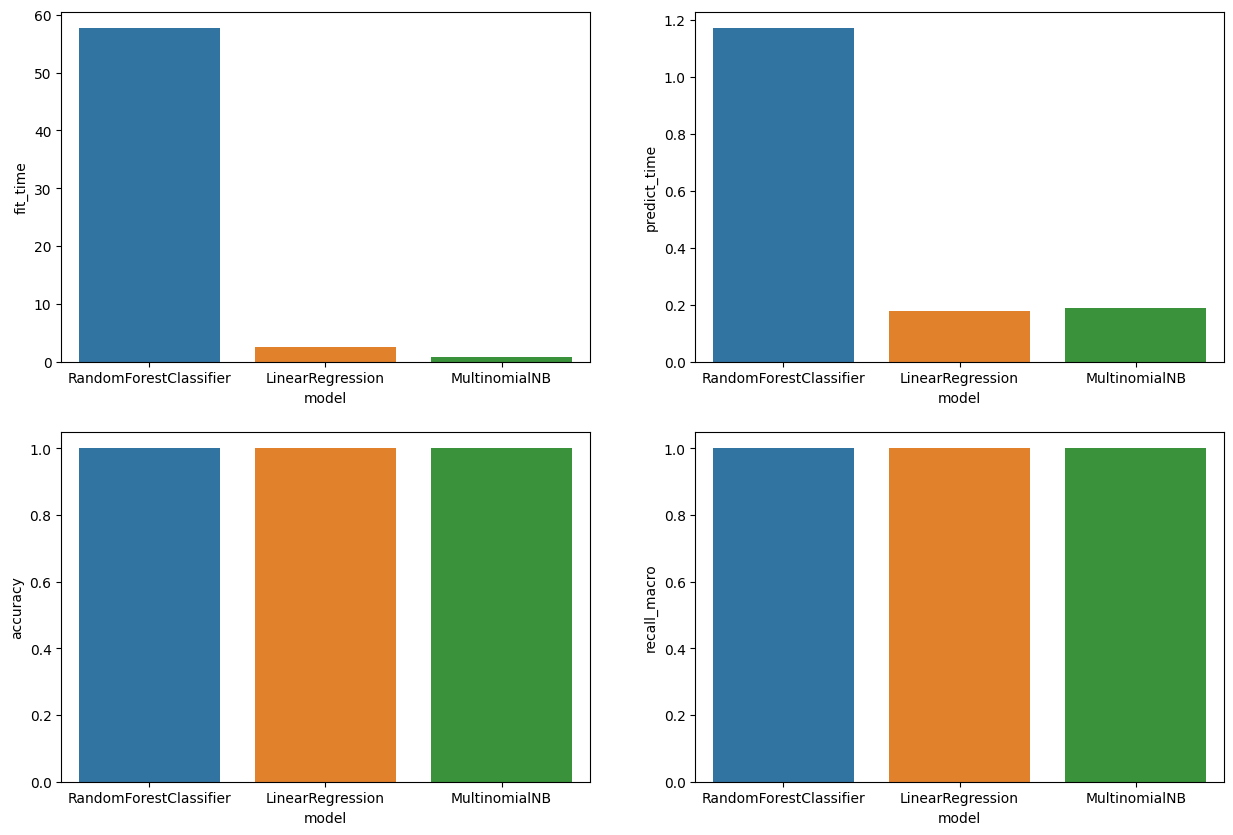

In [51]:
figure = plt.subplots(2, 2, figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(results_df, x='model', y='fit_time')
plt.subplot(2, 2, 2)
sns.barplot(results_df, x='model', y='predict_time')
plt.subplot(2, 2, 3)
sns.barplot(results_df, x='model', y='accuracy')
plt.subplot(2, 2, 4)
sns.barplot(results_df, x='model', y='recall_macro')

Наилучшей моделью оказалась LinearRegression.

## Применение модели

In [52]:
df

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date fake_or_true  \
0      December 31, 2017         Fake   
1      December 31, 2017         Fake   
2      December 30, 2017         Fake   
3      December 29, 2017         Fake   
4      December 25, 2017         Fake   
...                  ...          ...   
21412   August 22, 2017          True   
21413   August 22, 2017          True   
21414   August 22, 2017          True   
21415   August 22, 2017          True   
21416   August 22, 2017          True   

                                              clean_text  \
0      donald trump wish americans happy new year lea...   
1      house intelligence committee chairman devin nu...   
2      friday revealed former milwaukee sheriff david...   
3      christmas day donald trump announced would bac...   
4      pope francis used annual christmas day message...   
...                                                  ...   
21412  brussels reuters nato allies tuesday welcomed ...   
21413  london reuters lexisnexis provider legal regul...   
21414  minsk reuters shadow disused sovietera factori...   
21415  moscow reuters vatican secretary state cardina...   
21416  jakarta reuters indonesia buy 11 sukhoi fighte...   

                                             clean_title  \
0       donald trump sends embarrassing new year’s ev...   
1       drunk bragging trump staffer started russian ...   
2       sheriff david clarke becomes internet joke th...   
3       trump obsessed even obama’s name coded websit...   
4       pope francis called donald trump christmas sp...   
...                                                  ...   
21412  fully committed nato backs new us approach afg...   
21413    lexisnexis withdrew two products chinese market   
21414             minsk cultural hub becomes authorities   
21415  vatican upbeat possibility pope francis visiti...   
21416       indonesia buy 114 billion worth russian jets   

       subject_Government News  subject_Middle-east  subject_News  \
0                        False                False          True   
1                        False                False          True   
2                        False                False          True   
3                        False                False          True   
4                        False                False          True   
...                        ...                  ...           ...   
21412                    False                False        

In [53]:
tfidf_text = TfidfVectorizer()
tfidf_title = TfidfVectorizer()
X_fit_text = df['clean_text']
X_fit_title = df['clean_title']
tfidf_matrix_text = tfidf_text.fit_transform(X_fit_text)
tfidf_matrix_title = tfidf_text.fit_transform(X_fit_title)
X_fit_combined = hstack([tfidf_matrix_text, tfidf_matrix_title, df[dummies.columns]])
lr = LogisticRegression(
    C=0.001,
    penalty='l2'
    )
lr.fit(X_fit_combined, df['subject'])

LogisticRegression(C=0.001)

#### Сохраняем полученные нами TF-IDF векторизаторы и модель

In [54]:
with open('tfidf_text.pickle', 'wb') as f:
    pickle.dump(tfidf_text, f)
with open('tfidf_title.pickle', 'wb') as f:
    pickle.dump(tfidf_title, f)
with open('model.pickle', 'wb') as f:
    pickle.dump(lr, f)

### А что насчёт TruncatedSVD?


In [55]:
n_components = 2 
svd = TruncatedSVD(n_components=n_components)
tfidf_svd = svd.fit_transform(tfidf_matrix_text)

<Axes: >

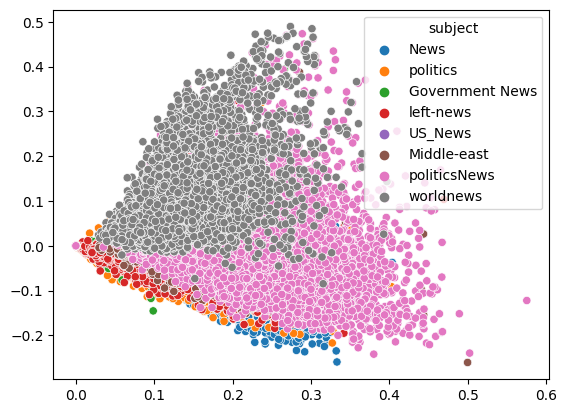

In [56]:
sns.scatterplot(x=tfidf_svd[:, 0], y=tfidf_svd[:, 1], hue=df['subject'], alpha=1,)

<Axes: >

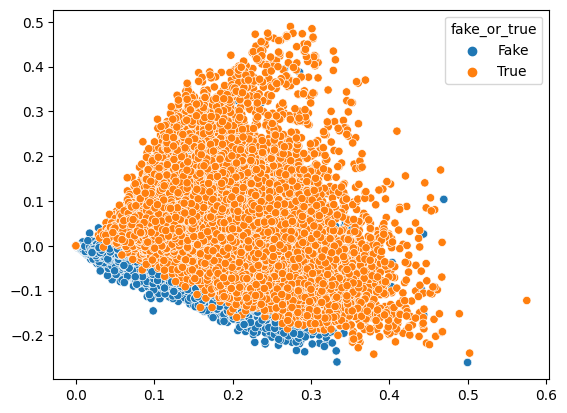

In [57]:
sns.scatterplot(x=tfidf_svd[:, 0], y=tfidf_svd[:, 1], hue=df['fake_or_true'], alpha=1,)

Суть графика такова: чем ближе точки находятся друг к другу, тем более сообщения похожи. В нашем случае мы можем судить, что гипотеза компактности выполняется. Ассессоры, вам - лайк.

## Эпилог
#### Почитать
* [Внедрение модели машинного обучения scikit-learn под Apache Spark](http://skine.ru/articles/438039/)
* [Пишем простой граббер для Telegram чатов на Python](http://proglib.io/p/pishem-prostoy-grabber-dlya-telegram-chatov-na-python-2019-11-06)

#### Посмотреть 
* [Плейлист по Django REST Framework](http://www.youtube.com/watch?v=i-uvtDKeFgE&list=PLA0M1Bcd0w8xZA3Kl1fYmOH_MfLpiYMRs)
* [Плейлист по Django 3.0](http://www.youtube.com/watch?v=FyTL1bnUx5I&list=PLA0M1Bcd0w8xO_39zZll2u1lz_Q-Mwn1F)
* [Плейлист по нейросетям](http://www.youtube.com/watch?v=nV7cI5zgOpk&list=PLA0M1Bcd0w8yv0XGiF1wjerjSZVSrYbjh)
* [Плейлист по машинному обучению](http://www.youtube.com/watch?v=NBtQmjnhFrA&list=PLA0M1Bcd0w8zxDIDOTQHsX68MCDOAJDtj)
* [Плейлист по парсингу](http://www.youtube.com/playlist?list=PLqGS6O1-DZLprgEaEeKn9BWKZBvzVi_la)

#### Пример интеграции модели в простую систему
У Вас есть небольшой веб-сервер. Заказчик требует, чтобы Вы могли время от времени сканировать сообщения в Базе данных и выделять от туда фейковые. 
У Вас есть обученные модели и Вам остаётся лишь аккуратно интегрировать в систему не поломав работу последней.

##### Простая реализация модуля многопоточной обработки

In [58]:
"""
Этот модуль содержит классы для реализации многопоточной (мультипроцессорной) обработки Датафреймов.
"""

from pandas import DataFrame
from pandas import concat
from numpy import array_split

from functools import singledispatchmethod
from concurrent.futures import ProcessPoolExecutor
from types import FunctionType, MethodType


class Splitter:
    """
    Класс 'Splitter' реализует задачу разделения датафрейма на поддатафреймы.

    Параметры:
    - workers (int) - Количество рабочих процессов для обработки данных.
    Подразумевается, что количество процессов будет равно количеству поддатафреймов.
    - ignore_dataframe_size (bool) - Игнорирует размер датафрейма.
    Если True, то Датафрейм будет выполняться в одном процессе.


    Пример использования:
    splitter = Splitter(workers=2, ignore_dataframe_size=True)
    split_dataframe = splitter.split_dataframe(df)
    split_dataframe() вернет список из поддатафреймов. Можно использовать напрямую в своих целях.

    Примечание:
    Если нет необходимости параллельной обработки, рекомендуется использовать встроенную функцию
    модуля 'numpy' array_split(). Этот класс предназначен для использования внутри класса ParallelProcessor
    """
    def __new__(cls, workers: int = 1, ignore_dataframe_size: bool = False):
        """
        Проверка на валидность параметров
        """
        if not isinstance(workers, int):
            raise TypeError(f"parameter 'workers' must be int type. You worker is {type(workers)} type")
        if 0 >= workers > 61:
            raise ValueError(f"Parameter 'workers' must be greater than 0 and lover than 62. Workers = {workers}")
        if not isinstance(ignore_dataframe_size, bool):
            raise TypeError(f"Parameter 'ignore_dataframe_size' must be bool type. "
                            f"Your ignore_dataframe_size is {type(ignore_dataframe_size)} type")
        return super().__new__(cls)

    def __init__(self, workers, ignore_dataframe_size):
        self.workers = workers
        self.ignore_dataframe_size = ignore_dataframe_size

    @singledispatchmethod
    def split_dataframe(self, dataframe: DataFrame) -> (TypeError | Exception):
        """
        Разделяет датафрейм на поддатафреймы для обработки.

        Параметры:
        - dataframe (DataFrame): Датафрейм, который необходимо разделить.

        Возвращает:
        - list[DataFrame]: Список поддатафреймов, готовых для обработки.

        Исключения:
        - TypeError: Если параметр 'dataframe' не является типом DataFrame.
        - Exception: Если параметр 'ignore_dataframe_size' равен False,
        и количество процессов больше, чем размер датафрейма.

        Пример использования:
        splitter = Splitter(workers=2, ignore_dataframe_size=False)
        dataframes = splitter.split_dataframe(df)
        """
        raise TypeError(f'Dataframe parameter must be DataFrame type. Your dataframe is {type(dataframe)} type')

    @split_dataframe.register(DataFrame)
    def _split_dataframe(self, dataframe):
        if self.ignore_dataframe_size:
            return [dataframe]
        else:
            if len(dataframe) < self.workers:
                raise Exception("Count of workers must be greater than lenght of dataframe object")
            else:
                return array_split(dataframe, self.workers)


class ParallelProcessor:
    """
    Класс ParallelProcessor реализует параллельную обработку набора датафреймов.

    Параметры:
    - splitter (Splitter): Объект класса Splitter для разделения датафреймов.
    - function (FunctionType): Пользовательская функция для обработки датафреймов.

    Пример использования:
    processor = ParallelProcessor(splitter, custom_function)
    """
    def __new__(cls, splitter: Splitter, function: FunctionType | MethodType):
        if not isinstance(splitter, Splitter):
            raise TypeError(f"Parameter 'splitter' must be Splitter type. Your splitter is {type(splitter)} type")
        if not isinstance(function, FunctionType | MethodType):
            raise TypeError(f"Parameter 'function' must be FunctionType. Your function is {type(function)} type")
        return super().__new__(cls)

    def __init__(self, splitter, function):
        self.splitter = splitter  # Сплиттер, для разделения датафрейма на поддатафреймы
        self.function = function  # Функция, которая должна обрабатывать датафрейм

    @singledispatchmethod
    def parallelize_dataframe(self, dataframe: DataFrame) -> TypeError:
        """
        Используя объект класса Splitter разделяет датафрейм и запускает параллельную обработку.

        Параметры:
        - dataframe (DataFrame): Датафрейм, который необходимо обработать

        Возвращает:
        - combined_df (DataFrame): Обработанный датафрейм

        Исключения:
        - TypeError: Если параметр 'dataframe' не является типом DataFrame.
        """
        raise TypeError(f"Parameter 'dataframe' must be DataFrame type.")

    @parallelize_dataframe.register(DataFrame)
    def _parallelize_dataframe(self, dataframe: DataFrame) -> DataFrame:
        dataframe_split = self.splitter.split_dataframe(dataframe)  # Разделение датафрейма
        workers = len(dataframe_split)  # Определение количества поток исходя из размера датафрейма
        with ProcessPoolExecutor(max_workers=workers) as executor:
            # Параллельная обработка датафрейма, с применением функции self.function()
            results = list(executor.map(self.function, dataframe_split))
        combined_df = concat(results)  # Объединение обработанных поддатафреймов
        return combined_df


##### Пример класса для обработки сообщений

In [59]:
class TextProcessor(ABC):
    def __init__(self, model, tfidf_text):
        self.model = model
        self.tfidf_vectorizer = tfidf_text
    
    @abstractmethod
    def processing(self):
        pass
    

class TextProcessorFakeNews(TextProcessor):
    # Переопределяем конструктор, так как нам необходимо загрузить 2 TFIDF-векторизатора
    def __init__(self, model, tfidf_text, tfidf_title):  
        self.model = model
        self.tfidf_text = tfidf_text
        self.tfidf_title = tfidf_title
    
    def processing(self, df):
        df['clean_text'] = df['text'].str.lower()
        df['clean_text'] = df['clean_text'].apply(lambda x: x.translate(str.maketrans('', '', punctuation)))
        df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x))
        df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([morph.parse(word)[0].normal_form for word in x.split(' ') if word not in stop_words]))
        X_fit_text = df['clean_text']
        X_fit_title = df['clean_title']
        tfidf_matrix_text = self.tfidf_text.fit_transform(X_fit_text)
        tfidf_matrix_title = self.tfidf_text.fit_transform(X_fit_title)
        X_fit_combined = hstack([tfidf_matrix_text, tfidf_matrix_title])
        predict = self.model.predict(X_fit_combined)
        df['predict'] = predict
        return df



##### DataBaseFetcher


In [60]:
class DataBaseFetcher(ABC):
    def __init__(self):
        pass
    
    def to_database(self):
        pass

##### Исполняемый модуль


In [61]:
with open('tfidf_text.pickle', 'rb') as f:
    tfidf_text = pickle.load(f)
with open('tfidf_title.pickle', 'rb') as f:
    tfidf_title = pickle.load(f)
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

    
df = pd.DataFrame()  # Боевой датафрейм из pd.from_records(query)
fetcher = DataBaseFetcher()
text_processor = TextProcessorFakeNews(
    model=model, 
    tfidf_text=tfidf_text, 
    tfidf_title=tfidf_title,
    )


splitter = Splitter(workers=40, ignore_dataframe_size=True)  # Поставить False когда загрузите боевые данные
processor = ParallelProcessor(splitter, text_processor.processing)
try:
    result_df = processor.parallelize_dataframe(df)
    fetcher.to_database(result_df)
except KeyError as ex:
    print(f'На этом этапе выдаст ошибку KeyError: {ex}, ведь фиктивны датафрейм не удовлетворяет нашим условиям!')



На этом этапе выдаст ошибку KeyError: 'text', ведь фиктивны датафрейм не удовлетворяет нашим условиям!


## Конец!